<a href="https://colab.research.google.com/github/Nithie-code/Data-Analysis/blob/main/Binomial_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
import io
import math
import statsmodels.api as sm
from  statsmodels.formula.api import ols

In [ ]:
# Load dataset
from google.colab import files
uploaded = files.upload()

Saving activity.csv to activity.csv


In [ ]:
# Explore the data
activity=pd.read_csv(io.BytesIO(uploaded['activity.csv']))
activity.head(15)


,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0
5,19.292,1
6,89.339,0
7,45.703,0
8,92.784,0
9,83.597,0


In [ ]:
activity.describe()

,Acc (vertical),LyingDown
count,494.000000,494.000000
mean,45.512363,0.516194
std,44.799360,0.500244
min,-48.459000,0.000000
25%,0.918650,0.000000
50%,41.109500,1.000000
75%,89.339000,1.000000
max,112.310000,1.000000


In [ ]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Acc (vertical)  494 non-null    float64
 1   LyingDown       494 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.8 KB


In [ ]:
#Binomial Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
#Save the data into X and Y variables
X=activity[['Acc (vertical)']]
y=activity[['LyingDown']]
#split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
#classifier
clf=LogisticRegression().fit(X_train,y_train)
print(clf.coef_)

[[-0.1177466]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(clf.intercept_)

[6.10177895]


<Axes: xlabel='Acc (vertical)', ylabel='LyingDown'>

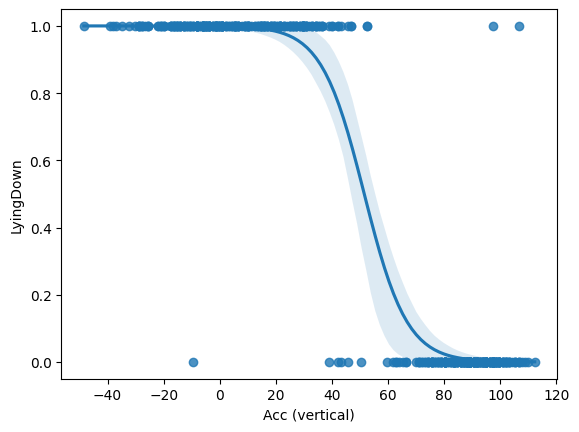

In [ ]:
#Using Sns we can plot logistic regression along with its confidence band
sns.regplot(x="Acc (vertical)", y = "LyingDown",data=activity,logistic=True)

In [ ]:
#predictions
y_predictions=clf.predict(X_test)
#Display Predictions. Recall 0 means Not Lying down, and 1 means lying down.
print(y_predictions)

[0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1
 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0
 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1
 1]


In [ ]:
# Evaluate our model with a confusion matrix
import sklearn.metrics as metrics
#Determine the confusion matrix's values in each quadrant
cm=metrics.confusion_matrix(y_test,y_predictions,labels=clf.classes_)

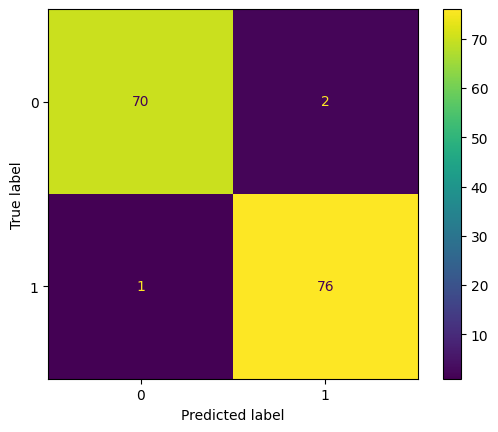

In [ ]:
# Display the confusion matrix
displ=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
displ.plot()

#Confusion Matrix Results Interpretation

1. True negatives(TN =70): The number of individuals who were not lying down and the model accurately predicted were indeed not lying down.
2.False negatives(FN=1): The number of individuals that were lying down that the model inaccurately predicted were not lying down
3.False positives(FP=2): The number of individuals that were not lying down that the model inaccurately predicted were lying down.
4.True positives(TP=76): The number of individuals that were lying down that the model accurately predicted were lying down.